In [2]:
import pandas as pd
import numpy as np

In [4]:
lst = ['Geeks','For','Geeks','is','portal','for','Geeks']
df = pd.DataFrame(lst)
df

,0
0,Geeks
1,For
2,Geeks
3,is
4,portal
5,for
6,Geeks


In [5]:
data = {'Name':['ram','shyam','princi','sita'],
        'Age':[20,21,19,18]
}
df = pd.DataFrame(data)
df

,Name,Age
0,ram,20
1,shyam,21
2,princi,19
3,sita,18


In [7]:
data = {'Name':['ram','shyam','princi','sita'],
        'Age':[20,21,19,18],
        'Address':['Delhi','Kanpur','Allabad','Janakpur'],
        'Qualification':['MEng','Msc','MCom','Phd']
}
df = pd.DataFrame(data)
print(df)
print(df[['Name','Address']])

     Name  Age   Address Qualification
0     ram   20     Delhi          MEng
1   shyam   21    Kanpur           Msc
2  princi   19   Allabad          MCom
3    sita   18  Janakpur           Phd
     Name   Address
0     ram     Delhi
1   shyam    Kanpur
2  princi   Allabad
3    sita  Janakpur


In [21]:
df = pd.DataFrame(data,index=data['Age'])
df

,Name,Age,Address,Qualification
20,ram,20,Delhi,MEng
21,shyam,21,Kanpur,Msc
19,princi,19,Allabad,MCom
18,sita,18,Janakpur,Phd


In [27]:
print(df.loc[20])
print()
print(df.iloc[3])

Name               ram
Age                 20
Address          Delhi
Qualification     MEng
Name: 20, dtype: object

Name                 sita
Age                    18
Address          Janakpur
Qualification         Phd
Name: 18, dtype: object


In [38]:
dict1 = {'First':[100,90,np.nan,95],
'Second':[45,np.nan,30,20],
'Third':[10,20,30,40]}
df=pd.DataFrame(dict1)
df.isnull()

,First,Second,Third
0,False,False,False
1,False,True,False
2,True,False,False
3,False,False,False


In [32]:
df.fillna(0)

,First,Second,Third
0,100.0,45.0,10
1,90.0,0.0,20
2,0.0,30.0,30
3,95.0,20.0,40


In [36]:
df.interpolate(method='cubicspline')

,First,Second,Third
0,100.000000,45.000000,10
1,90.000000,38.333333,20
2,88.333333,30.000000,30
3,95.000000,20.000000,40


In [41]:
df.replace(np.nan,0)

,First,Second,Third
0,100.0,45.0,10
1,90.0,0.0,20
2,0.0,30.0,30
3,95.0,20.0,40


In [42]:
for i,j in df.iterrows():
    print(i)
    print()
    print(j)

0

First     100.0
Second     45.0
Third      10.0
Name: 0, dtype: float64
1

First     90.0
Second     NaN
Third     20.0
Name: 1, dtype: float64
2

First      NaN
Second    30.0
Third     30.0
Name: 2, dtype: float64
3

First     95.0
Second    20.0
Third     40.0
Name: 3, dtype: float64


In [57]:
columns = list(df)
for i in columns:
    print(df[i][0])
print(columns)

100.0
45.0
10
['First', 'Second', 'Third']


DATA CLEANING

In [61]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [15]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [17]:
cat_col
num_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [40]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [62]:
df = df.drop(columns=['Name','PassengerId','Ticket'])

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [63]:
round((df.isnull().sum()/df.shape[0])*100,2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

In [64]:
df = df.drop(columns=['Cabin'])

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [65]:
df = df.dropna(subset=['Embarked'],axis=0)

In [47]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [66]:
df.shape

(889, 8)

In [67]:
df = df.fillna(df.Age.mean())

In [51]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [68]:
import matplotlib.pyplot as plt

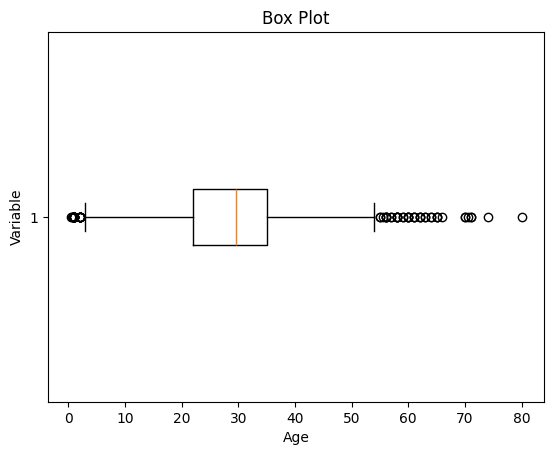

In [71]:
plt.boxplot(df['Age'],vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [72]:
mean = df['Age'].mean()
std = df['Age'].std()
lower_bound = mean-std*2
upper_bound = mean+std*2
print(lower_bound,upper_bound)

3.7054001079256587 55.57878528533277


In [77]:
df = df[(df['Age']>= lower_bound) & (df['Age']<=upper_bound)]

In [78]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.642093,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [81]:
X = df[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df['Survived']

In [83]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X

x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15464\4184666528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S
